<a href="https://colab.research.google.com/github/plaban1981/Agents/blob/main/Langraph_multiagent_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install -qU langchain langchain-core langchain-groq langchain-community langchain-openai langgraph-supervisor langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223

In [4]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [5]:
from langchain_groq import ChatGroq
groq_model=ChatGroq(model="deepseek-r1-distill-llama-70b",temperature=0.6)

### Create Pydantic Model

In [6]:
from typing import List
from pydantic import BaseModel, Field
#
class TaskEstimate(BaseModel):
  task_name:str=Field(...,description="Name ofg the Task")
  estimated_hours:float= Field(...,description="Estimated hours for the task in hours")
  required_resources:List[str]=Field(...,description="List of resources required for the completion of the task")
#

### Define  Tools

#### Task Planning

In [29]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser,StrOutputParser
#
def planningTool(project_type,project_requirements,team_mbers,objective):
  """Task Planner Function tool that helps to plan tasks"""
  prompt = """Carefully analyze the project requirements for the Project : {project_type} and break them down into individual tasks.
  Define each task's scope in detail,set achievable timelines and ensure that all the dependencies are accounted for:

  Project Objective: {objective}

  Project Requirement:
  {project_requirements}

  Team Members:
  {team_members}

  The final output should be a comprehensive list of taks with detailed scope,timelines,description,dependencies and deliverables.
  Your final OUTPUT must include a Gnatt Chart or similar timeline visualization specific to {project_type} project.
  """
  final_prompt = PromptTemplate(input_variables=["project_type","project_requirements","team_members","objective"],template=prompt)
  chain = final_prompt | groq_model | StrOutputParser()
  response = chain.invoke({"project_type":project_type,"project_requirements":project_requirements,"team_members":team_mbers,"objective":objective})
  return response

In [30]:
project_type ="website"
objective = "Create a website for a small business"
team_mbers ="""
- John Doe (Project Manager)
- Alice (Software Engineer)
- Bob Smith (FrontEnd Designer)
- Victor (QA Engineer)
- Tom Hardy (QA Engineer)
"""
project_requirements="""
- Create a responsive design that works well on desktop and mobile app
- Implement a modern visually appealing user interface with a cleann look
- Develop a user friendly navigation system with intutive menu structure
- Include an 'About Us' page highlighting the company's history and values
- Design a 'Services' page showcasing the business offerings with descriptions
- create a 'contact us' page with form and integrated map for communication
- Implement a 'blog' section for sharing industry news and company updates
- Ensure fast uploading time and optimize for Search Engines(SEO)
- Integrate Social media links and sharing capabilities
- Include testimonials section to showcase customer feedback and build trust
"""

In [31]:
res = planningTool(project_type,project_requirements,team_mbers,objective)

In [13]:
print(res.split("</think>")[-1])



### Project Plan for Small Business Website Development

#### **Project Overview**
The objective is to create a responsive, modern website for a small business, incorporating key features such as SEO optimization, social media integration, and a user-friendly interface. The project is divided into phases, each with specific tasks, timelines, and deliverables.

#### **Project Phases and Tasks**

1. **Planning Phase**
   - **Task 1.1: Project Plan and Requirements Gathering**
     - **Scope:** Define project scope, timeline, budget, and resources.
     - **Timeline:** Week 1
     - **Dependency:** None
     - **Deliverable:** Project plan document.

2. **Design Phase**
   - **Task 2.1: Wireframes**
     - **Scope:** Create layout for each page.
     - **Timeline:** Week 2
     - **Dependency:** Task 1.1
     - **Deliverable:** Wireframe documents.
   - **Task 2.2: Design Mockups**
     - **Scope:** Visual design incorporating brand identity.
     - **Timeline:** Week 3
     - **Depende

In [21]:
from langchain_openai import ChatOpenAI
#
openai_llm = ChatOpenAI(model="gpt-4o-mini",temperature=0)


In [35]:
from langgraph.prebuilt import create_react_agent
task_planning_agent = create_react_agent(model=groq_model,
                                         tools=[planningTool],
                                         name="Task_Planner",
                                         prompt="""You are expert Task Planner""")

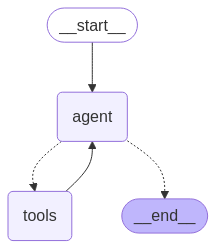

In [36]:
task_planning_agent

In [37]:
task_planning_agent.invoke({"project_type":project_type,"project_requirements":project_requirements,"team_members":team_mbers,"objective":objective})

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_40m6', 'function': {'arguments': '{\n    "objective": "Develop a new web application",\n    "project_requirements": ["User authentication", "Data storage", "API integration"],\n    "project_type": "Software Development",\n    "team_members": ["Frontend Developer", "Backend Developer", "Designer"]\n  }', 'name': 'planningTool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 299, 'prompt_tokens': 154, 'total_tokens': 453, 'completion_time': 1.087272727, 'prompt_time': 0.013260055, 'queue_time': 1.005828519, 'total_time': 1.100532782}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_fc872c073e', 'finish_reason': 'tool_calls', 'logprobs': None}, name='Task_Planner', id='run-f9d8d5b0-6b0b-4ecc-b024-c4ace4d08f6b-0', tool_calls=[{'name': 'planningTool', 'args': {'objective': 'Develop a new web application', 'project_requirements': ['User authentication',

#### Time Estimation Agent

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser,StrOutputParser
#
def estimationTool(project_type):
  """Resource and Time Estimation Function tool that helps to estimate time,resources and effort reuired to complete a project"""
  prompt = """Carefully analyze the project requirements for the Project : {project_type} and break them down into individual tasks.
  Define each task's scope in detail,set achievable timelines and ensure that all the dependencies are accounted for:

  Project Objective: {objective}

  Project Requirement:
  {project_requirements}

  Team Members:
  {team_members}

  The final output should be a comprehensive list of taks with detailed scope,timelines,description,dependencies and deliverables.
  Your final OUTPUT must include a Gnatt Chart or similar timeline visualization specific to {project_type} project.
  """
  final_prompt = PromptTemplate(input_variables=["project_type","project_requirements","team_members","objective"],template=prompt)
  chain = final_prompt | groq_model | StrOutputParser()
  response = chain.invoke({"project_type":project_type,"project_requirements":project_requirements,"team_members":team_mbers,"objective":objective})
  return response